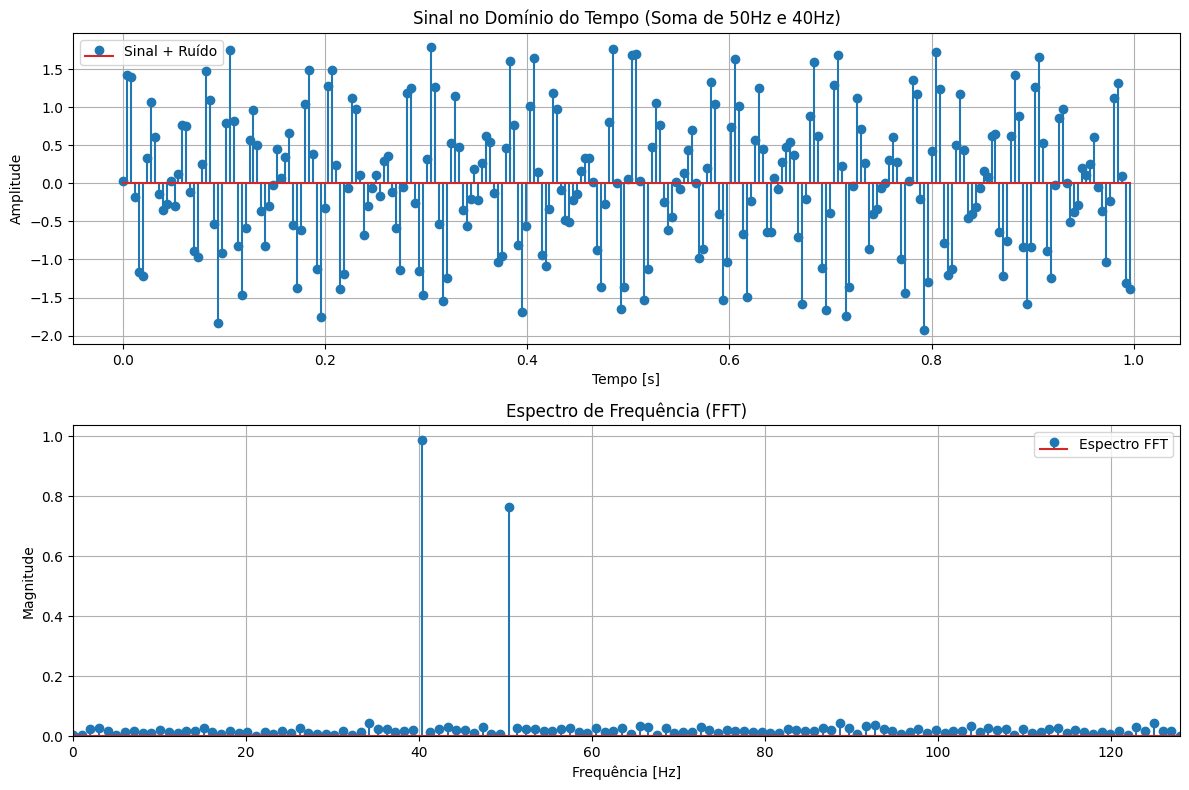

In [7]:
#ALUNO: JOSÉ IVINES MATOS SILVA
#DICSCIPLINA: PROCESSAMENTO DIGITAL DE SINAIS
#OBJETIVO DO CÓDIGO:IMPLEMENTAÇÃO DA TRANSFORMADA RÁPIDA DE FOURIER (FFT)

import numpy as np
import matplotlib.pyplot as plt

def fft_recursiva(x):
    N = len(x)

    #garantir que o tamanho da entrada é uma potência de 2
    if N & (N - 1) != 0 and N > 0:
        raise ValueError("O tamanho da entrada (N) deve ser uma potência de 2.")

    #caso base
    if N == 1:
        return x

    #separa o sinal em parte par e ímpar.
    x_par = x[::2]
    x_impar = x[1::2]

    #chamada recursiva para cada metade do sinal.
    X_par = fft_recursiva(x_par)
    X_impar = fft_recursiva(x_impar)

    #calcula os fatores de torção (twiddle factors).
    twiddle_factors = np.exp(-2j * np.pi * np.arange(N) / N)

    # Combina os resultados usando a operação "butterfly".
    primeira_metade = X_par + twiddle_factors[:N//2] * X_impar
    segunda_metade = X_par + twiddle_factors[N//2:] * X_impar

    return np.concatenate([primeira_metade, segunda_metade])


if __name__ == "__main__":   #boa pratica de programação pois seguinte parte do código não roda como .py ficando apenas a parte anterior do código
    fs = 256.0  #taxa de amostragem (Hz)
    N = 256     #numero de pontos da FFT
    T = 1.0 / fs #período de amostragem

    t = np.linspace(0.0, N*T, N, endpoint=False)

    # Criação do Sinal
    freq1 = 50
    amp1 = 0.8
    freq2 = 40
    amp2 = 1.0
    sinal = amp1 * np.sin(freq1 * 2.0 * np.pi * t) + amp2 * np.sin(freq2 * 2.0 * np.pi * t)
    sinal += np.random.normal(0, 0.15, N)  #adicionando o ruído

    fft_calculada = fft_recursiva(sinal)

    freq_eixo = np.linspace(0.0, fs/2.0, N//2)
    magnitude = 2.0/N * np.abs(fft_calculada[0:N//2])

    # Encontra os picos para verificação
    picos_indices = np.argsort(magnitude)[-2:]
    freq_picos = freq_eixo[picos_indices]
    amp_picos = magnitude[picos_indices]

    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    plt.stem(t, sinal, label='Sinal + Ruído') # Usar plot para melhor visualização da onda
    plt.title(f"Sinal no Domínio do Tempo (Soma de {freq1}Hz e {freq2}Hz)")
    plt.xlabel("Tempo [s]")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)

    # Gráfico do Espectro de Frequência
    plt.subplot(2, 1, 2)
    plt.stem(freq_eixo, magnitude, label='Espectro FFT')
    plt.title("Espectro de Frequência (FFT)")
    plt.xlabel("Frequência [Hz]")
    plt.ylabel("Magnitude")
    plt.legend()
    plt.grid(True)
    plt.xlim(0, fs/2.0)
    plt.ylim(bottom=0)

    plt.tight_layout()
    plt.show()